# What is IForest behavior according to the dataset dimension size?

## Test with 1 dimension dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from matplotlib.mlab import frange
import statistics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from imblearn.metrics import specificity_score
from imblearn.metrics import sensitivity_score
import matplotlib.cm as cm
from mpl_toolkits import mplot3d
from imblearn.metrics import specificity_score

Using TensorFlow backend.


## Generals settings

In [2]:
datasets_path = '/Users/thesard/Doctorat/These2018/ISEP/Developpements/AnacondaWorkSpace/LearningPython/datasets/'

## Chargement du jeu de données

Le jeu de données artificiel généré suivant une distribution gaussienne.
Il s'agit d'un jeu de données univarié ou unidimensionnel contenant des données normales et anormales.
Les données normales suivent une distribution gaussienne de paramètres mu = 0 et sigma = 1.
Les données anormales suivent une distribution gaussienne de paramètres mu = 5 et de sigma = 1.

In [3]:
dataset_path = datasets_path+"synthetic_1D_data/synthetic_1D_data_2019-12-17 10:43:50.547607.csv"
all_dataset_brut = pd.read_csv(dataset_path, header=None, index_col=None)
dataset_number_dimension = len(all_dataset_brut.columns)
all_dataset_brut.describe()

,0
count,1516.000000
mean,0.032098
std,1.107025
min,-3.334118
25%,-0.692580
50%,-0.034028
75%,0.649778
max,6.867883


In [4]:
#dataset_brut = pd.DataFrame(np.where(all_dataset_brut[dataset_number_dimension-1]=='1'))
#dataset_brut = all_dataset_brut[dataset_number_dimension-1] == '1'
dataset_brut = all_dataset_brut[all_dataset_brut[dataset_number_dimension-1] == '1']
#data_brut[data_brut[9] == "n"]
#dataset_brut

,0,1
1,-0.784259,1
2,0.788448,1
3,-2.008725,1
4,-0.168597,1
5,-1.344871,1
6,-1.238408,1
7,-0.415356,1
8,-3.125944,1
9,0.839305,1
10,-1.711120,1


In [5]:

if dataset_number_dimension-2 == 0:
    X_brut_brut = dataset_brut[0]
elif dataset_number_dimension-2 > 0:
    X_brut_brut = dataset_brut[[0,dataset_number_dimension-2]]
else:
    print("There is an error in the dataset you uploaded. It have to have at least 2 columns.")
X_brut = pd.DataFrame(X_brut_brut)
y_brut = dataset_brut[dataset_number_dimension-1]
#y_brut = pd.DataFrame(y_brut_brut)

In [6]:
dataset_brut.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 1 to 1500
Data columns (total 2 columns):
0    1500 non-null float64
1    1500 non-null object
dtypes: float64(1), object(1)
memory usage: 35.2+ KB


## Transformation de la classe à expliquer

L'objectif ici est de remplacer les "0" par -1 et les "1" par 1 afin de faire les matrices de confusion avec la fonction dédiée de scikit-learn.

In [7]:
y_transform = y_brut
y_transform = np.where(y_transform=='0',-1,1)
y_transform

array([1, 1, 1, ..., 1, 1, 1])

## Execution of IForest on the dataset

In [47]:
specificities =[]
roc_aucs = []
for i in range(5):
    # Instanciation, fit and predict on Shuttle
    GENE_func_IF = IsolationForest(behaviour="new", contamination=0.0001)
    GENE_func_IF.fit(X_brut)
    GENE_y_pred_IF = GENE_func_IF.predict(X_brut)
    #print(GENE_y_pred_IF)
    # Calcul de l'aire sous la courbe ROC
    y_DF_IF = GENE_func_IF.decision_function(X_brut)

    # Matrice de confusion
    #ttn, tfp, tfn, ttp = confusion_matrix(y_transform_Shuttle, MS_y_pred_IF_Shuttle).ravel()
    print(confusion_matrix(y_transform, GENE_y_pred_IF))
    #ROC AUC
    #roc_aucs.append(roc_auc_score(y_transform, y_DF_IF))
    # Specificity
    specificities.append(specificity_score(y_transform, GENE_y_pred_IF))
#print("ROC AUC")
#print(roc_aucs)
print("Specificities")
print(specificities)
#min_roc_auc = max(roc_aucs)
#print("min_roc_auc = "+str(min_roc_auc))

[[   0    0]
 [   1 1499]]


/Users/thesard/anaconda3/lib/python3.7/site-packages/imblearn/metrics/_classification.py:239: UndefinedMetricWarning: Specificity is ill-defined and being set to 0.0 due to no predicted samples.
  warn_for)


[[   0    0]
 [   1 1499]]


/Users/thesard/anaconda3/lib/python3.7/site-packages/imblearn/metrics/_classification.py:239: UndefinedMetricWarning: Specificity is ill-defined and being set to 0.0 due to no predicted samples.
  warn_for)


[[   0    0]
 [   1 1499]]


/Users/thesard/anaconda3/lib/python3.7/site-packages/imblearn/metrics/_classification.py:239: UndefinedMetricWarning: Specificity is ill-defined and being set to 0.0 due to no predicted samples.
  warn_for)


[[   0    0]
 [   1 1499]]


/Users/thesard/anaconda3/lib/python3.7/site-packages/imblearn/metrics/_classification.py:239: UndefinedMetricWarning: Specificity is ill-defined and being set to 0.0 due to no predicted samples.
  warn_for)


[[   0    0]
 [   1 1499]]
Specificities
[0.0, 0.0, 0.0, 0.0, 0.0]


/Users/thesard/anaconda3/lib/python3.7/site-packages/imblearn/metrics/_classification.py:239: UndefinedMetricWarning: Specificity is ill-defined and being set to 0.0 due to no predicted samples.
  warn_for)


In [39]:
150/1500

0.1

## Test avec le témoin LOF

In [10]:
from sklearn.neighbors import LocalOutlierFactor
for i in range(5):
    # Instanciation, fit and predict on Shuttle
    func_LOF = LocalOutlierFactor(novelty = True)
    func_LOF.fit(X_brut)
    y_pred_LOF = func_LOF.predict(X_brut)
    # Calcul de l'aire sous la courbe ROC
    y_DF_LOF = func_LOF.decision_function(X_brut)

    # Matrice de confusion
    #ttn, tfp, tfn, ttp = confusion_matrix(y_transform_Shuttle, MS_y_pred_IF_Shuttle).ravel()
    print(confusion_matrix(y_transform, y_pred_LOF))

    #print(roc_auc_score(y_transform, y_DF_LOF))

[[   0    0]
 [ 123 1377]]
[[   0    0]
 [ 123 1377]]
[[   0    0]
 [ 123 1377]]
[[   0    0]
 [ 123 1377]]
[[   0    0]
 [ 123 1377]]


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/Users/thesard/anaconda3/lib/python3.7/site-packages/skl

## Truncate the dataset
To see what happen if we delete the data which are very far from the mean

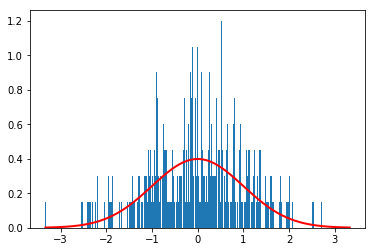

In [14]:
sigma = 1
mu = 0
size = 1500
count, bins, ignored = plt.hist(X_brut[0], size, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2)), linewidth=2, color='r')
plt.show()

## Recherche du nombre de données très éloignées de la moyenne

In [29]:
sup_mu_plus_sigma = X_brut[X_brut[0] >= mu + sigma]
len(sup_mu_plus_sigma)

235

In [28]:
inf_mu_plus_sigma = X_brut[X_brut[0] <= mu - sigma]
len(inf_mu_plus_sigma)

233

In [33]:
truncate_1_data = X_brut[X_brut[0] >= mu - sigma]
truncate_2_data = truncate_1_data[truncate_1_data[0] <= mu + sigma]
len(truncate_2_data)

1032

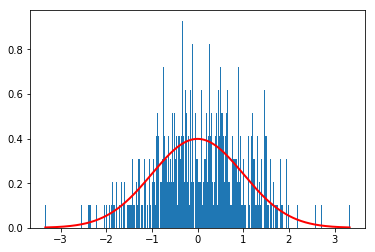

In [34]:
count, bins, ignored = plt.hist(X_brut[0], len(truncate_2_data), density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2)), linewidth=2, color='r')
plt.show()

In [36]:
y_truncate_transform = truncate_2_data
y_truncate_transform = np.where(y_truncate_transform=='0',-1,1)
y_truncate_transform

/Users/thesard/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [45]:
# Instanciation, fit and predict on Shuttle
func_IF = IsolationForest(behaviour="new", contamination=0.0001)
func_IF.fit(truncate_2_data)
y_pred_IF = func_IF.predict(truncate_2_data)
print(confusion_matrix(y_truncate_transform, y_pred_IF))

[[   0    0]
 [   1 1031]]


In [41]:
104/len(truncate_2_data)

0.10077519379844961